In [ ]:
import warnings
warnings.filterwarnings("ignore")

import time
import pandas as pd
import sys
import os
import gc
import re
import time
!pip install distance
import distance
import spacy
nlp = spacy.load('en_core_web_sm')
import sqlite3
import csv
import math
#import six
import datetime as dt
from tqdm import tqdm
from os import path
from PIL import Image

import numpy as np
import pandas as pd
from collections import Counter, defaultdict

import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

from sklearn.preprocessing import MinMaxScaler

from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.ensemble import StackingClassifier

from scipy.sparse import hstack

from sqlalchemy import create_engine # database connection

import xgboost as xgb

     |████████████████████████████████| 180 kB 9.0 MB/s 
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16276 sha256=dc1d4ef29011ed8b2c247730b2fb0a7f1dadd865ed83119e03bfc1d34bccd373
  Stored in directory: /root/.cache/pip/wheels/b2/10/1b/96fca621a1be378e2fe104cfb0d160bb6cdf3d04a3d35266cc
Successfully built distance


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dm_project/final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y'],   encoding='utf-8', )


In [ ]:
df.columns.tolist()

['Unnamed: 0',
 'id',
 'is_duplicate',
 'cwc_min',
 'cwc_max',
 'csc_min',
 'csc_max',
 'ctc_min',
 'ctc_max',
 'last_word_eq',
 'first_word_eq',
 'abs_len_diff',
 'mean_len',
 'token_set_ratio',
 'token_sort_ratio',
 'fuzz_ratio',
 'fuzz_partial_ratio',
 'longest_substr_ratio',
 'freq_qid1',
 'freq_qid2',
 'q1len',
 'q2len',
 'q1_n_words',
 'q2_n_words',
 'word_Common',
 'word_Total',
 'word_share',
 'freq_q1+q2',
 'freq_q1-q2',
 '0_x',
 '1_x',
 '2_x',
 '3_x',
 '4_x',
 '5_x',
 '6_x',
 '7_x',
 '8_x',
 '9_x',
 '10_x',
 '11_x',
 '12_x',
 '13_x',
 '14_x',
 '15_x',
 '16_x',
 '17_x',
 '18_x',
 '19_x',
 '20_x',
 '21_x',
 '22_x',
 '23_x',
 '24_x',
 '25_x',
 '26_x',
 '27_x',
 '28_x',
 '29_x',
 '30_x',
 '31_x',
 '32_x',
 '33_x',
 '34_x',
 '35_x',
 '36_x',
 '37_x',
 '38_x',
 '39_x',
 '40_x',
 '41_x',
 '42_x',
 '43_x',
 '44_x',
 '45_x',
 '46_x',
 '47_x',
 '48_x',
 '49_x',
 '50_x',
 '51_x',
 '52_x',
 '53_x',
 '54_x',
 '55_x',
 '56_x',
 '57_x',
 '58_x',
 '59_x',
 '60_x',
 '61_x',
 '62_x',
 '63_x',


In [ ]:
df_tmp1=df.drop(df.index[0])
y_true = df_tmp1['is_duplicate']
df_tmp2=df_tmp1.drop(['Unnamed: 0', 'id','is_duplicate'], axis=1)

cols = list(df_tmp2.columns)
data = pd.DataFrame(np.array(df_tmp2.values,dtype=np.float64),columns=cols)
y_true = list(map(int, y_true.values))
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [ ]:
df.shape

(404291, 221)

In [ ]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (283003, 218)
Number of data points in test data : (121287, 218)


For values of alpha =  1e-05 The log loss is: 0.447369797868122
For values of alpha =  0.0001 The log loss is: 0.4463727788405423
For values of alpha =  0.001 The log loss is: 0.4464084779596063
For values of alpha =  0.01 The log loss is: 0.4268297011983525
For values of alpha =  0.1 The log loss is: 0.44773875926521195
For values of alpha =  1 The log loss is: 0.48625502843435786
For values of alpha =  10 The log loss is: 0.5301090182672484


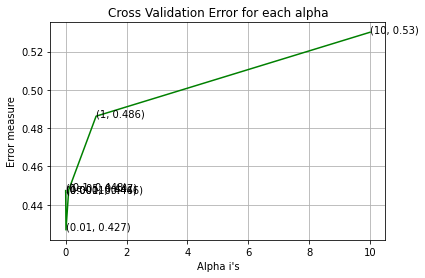

For values of best alpha =  0.01 The train log loss is: 0.4278297563503592
For values of best alpha =  0.01 The test log loss is: 0.4268297011983525
Total number of data points : 121287
Time elapsed for model with tmp:- 3185.4892745018005


In [ ]:
start = time.time()
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
end = time.time()
print("Time elapsed for model with tmp:-",end - start)


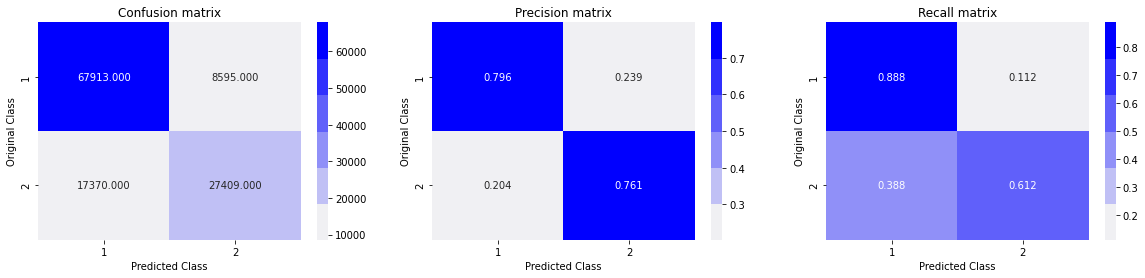

In [ ]:

plot_confusion_matrix(y_test, predicted_y)

In [ ]:
df_tmp3= df_tmp2.drop(df_tmp2.iloc[:, 0:26], axis = 1)
df_tmp4= df_tmp2.drop(df_tmp2.iloc[:, 26:218], axis = 1)


cols_tmp3 = list(df_tmp3.columns)
data_tmp3 = pd.DataFrame(np.array(df_tmp3.values,dtype=np.float64),columns=cols_tmp3)
X_train_tmp3,X_test_tmp3, y_train_tmp3, y_test_tmp3 = train_test_split(data_tmp3, y_true, stratify=y_true, test_size=0.3)


cols_tmp4 = list(df_tmp4.columns)
data_tmp4 = pd.DataFrame(np.array(df_tmp4.values,dtype=np.float64),columns=cols_tmp4)
X_train_tmp4,X_test_tmp4, y_train_tmp4, y_test_tmp4 = train_test_split(data_tmp4, y_true, stratify=y_true, test_size=0.3)



In [ ]:

df_tmp5= df_tmp4.drop(df_tmp2.iloc[:, 0:15], axis = 1)
df_tmp6= df_tmp4.drop(df_tmp2.iloc[:, 15:26], axis = 1)


cols_tmp5 = list(df_tmp5.columns)
data_tmp5 = pd.DataFrame(np.array(df_tmp5.values,dtype=np.float64),columns=cols_tmp5)
X_train_tmp5,X_test_tmp5, y_train_tmp5, y_test_tmp5 = train_test_split(data_tmp5, y_true, stratify=y_true, test_size=0.3)


cols_tmp6 = list(df_tmp6.columns)
data_tmp6 = pd.DataFrame(np.array(df_tmp6.values,dtype=np.float64),columns=cols_tmp6)
X_train_tmp6,X_test_tmp6, y_train_tmp6, y_test_tmp6 = train_test_split(data_tmp6, y_true, stratify=y_true, test_size=0.3)




For values of alpha =  1e-05 The log loss is: 0.6270035164677841
For values of alpha =  0.0001 The log loss is: 0.6319642845393952
For values of alpha =  0.001 The log loss is: 0.6213079681373493
For values of alpha =  0.01 The log loss is: 0.6241280087595757
For values of alpha =  0.1 The log loss is: 0.6124272839729114
For values of alpha =  1 The log loss is: 0.6115365973560087
For values of alpha =  10 The log loss is: 0.6115471136918792


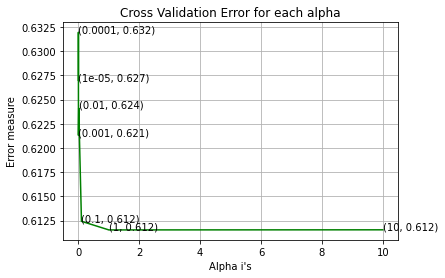

For values of best alpha =  1 The train log loss is: 0.6100149089344582
For values of best alpha =  1 The test log loss is: 0.6115365973560087
Total number of data points : 121287
Time elapsed for model with tmp3:- 4364.448320865631


In [ ]:
start = time.time()
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf_tmp3 = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf_tmp3.fit(X_train_tmp3, y_train_tmp3)
    sig_clf_tmp3 = CalibratedClassifierCV(clf_tmp3, method="sigmoid")
    sig_clf_tmp3.fit(X_train_tmp3, y_train_tmp3)
    predict_y_tmp3 = sig_clf_tmp3.predict_proba(X_test_tmp3)
    log_error_array.append(log_loss(y_test_tmp3, predict_y_tmp3, labels=clf_tmp3.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tmp3, predict_y_tmp3, labels=clf_tmp3.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf_tmp3 = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf_tmp3.fit(X_train_tmp3, y_train_tmp3)
sig_clf_tmp3 = CalibratedClassifierCV(clf_tmp3, method="sigmoid")
sig_clf_tmp3.fit(X_train_tmp3, y_train_tmp3)

predict_y_tmp3 = sig_clf_tmp3.predict_proba(X_train_tmp3)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tmp3, predict_y_tmp3, labels=clf_tmp3.classes_, eps=1e-15))
predict_y_tmp3 = sig_clf_tmp3.predict_proba(X_test_tmp3)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tmp3, predict_y_tmp3, labels=clf_tmp3.classes_, eps=1e-15))
predicted_y_tmp3 =np.argmax(predict_y_tmp3,axis=1)
print("Total number of data points :", len(predicted_y_tmp3))

end = time.time()
print("Time elapsed for model with tmp3:-",end - start)


For values of alpha =  1e-05 The log loss is: 0.42019124150685705
For values of alpha =  0.0001 The log loss is: 0.4553582338810265
For values of alpha =  0.001 The log loss is: 0.46034606821623625
For values of alpha =  0.01 The log loss is: 0.43589892059545843
For values of alpha =  0.1 The log loss is: 0.44875545865038896
For values of alpha =  1 The log loss is: 0.48859748969569694
For values of alpha =  10 The log loss is: 0.5438947706419642


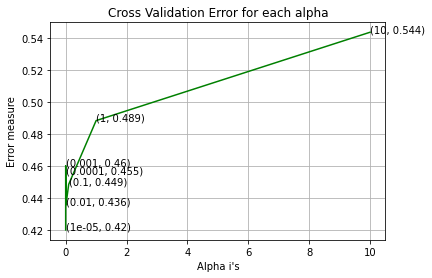

For values of best alpha =  1e-05 The train log loss is: 0.41690578118766713
For values of best alpha =  1e-05 The test log loss is: 0.42019124150685705
Total number of data points : 121287
Time elapsed for model with tmp4:- 1599.0008947849274


In [ ]:
start = time.time()
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf_tmp4 = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf_tmp4.fit(X_train_tmp4, y_train_tmp4)
    sig_clf_tmp4 = CalibratedClassifierCV(clf_tmp4, method="sigmoid")
    sig_clf_tmp4.fit(X_train_tmp4, y_train_tmp4)
    predict_y_tmp4 = sig_clf_tmp4.predict_proba(X_test_tmp4)
    log_error_array.append(log_loss(y_test_tmp4, predict_y_tmp4, labels=clf_tmp4.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tmp4, predict_y_tmp4, labels=clf_tmp4.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf_tmp4 = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf_tmp4.fit(X_train_tmp4, y_train_tmp4)
sig_clf_tmp4 = CalibratedClassifierCV(clf_tmp4, method="sigmoid")
sig_clf_tmp4.fit(X_train_tmp4, y_train_tmp4)

predict_y_tmp4 = sig_clf_tmp4.predict_proba(X_train_tmp4)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tmp4, predict_y_tmp4, labels=clf_tmp4.classes_, eps=1e-15))
predict_y_tmp4 = sig_clf_tmp4.predict_proba(X_test_tmp4)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tmp4, predict_y_tmp4, labels=clf_tmp4.classes_, eps=1e-15))
predicted_y_tmp4 =np.argmax(predict_y_tmp4,axis=1)
print("Total number of data points :", len(predicted_y_tmp4))
end = time.time()

print("Time elapsed for model with tmp4:-",end - start)


In [ ]:
import pickle

filename = '/content/drive/MyDrive/dm_project/finalized_model_sgd_tmp.sav'
pickle.dump(sig_clf, open(filename, 'wb'))

filename = '/content/drive/MyDrive/dm_project/finalized_model_sgd_tmp3.sav'
pickle.dump(sig_clf_tmp3, open(filename, 'wb'))

filename = '/content/drive/MyDrive/dm_project/finalized_model_sgd_tmp4.sav'
pickle.dump(sig_clf_tmp4, open(filename, 'wb'))

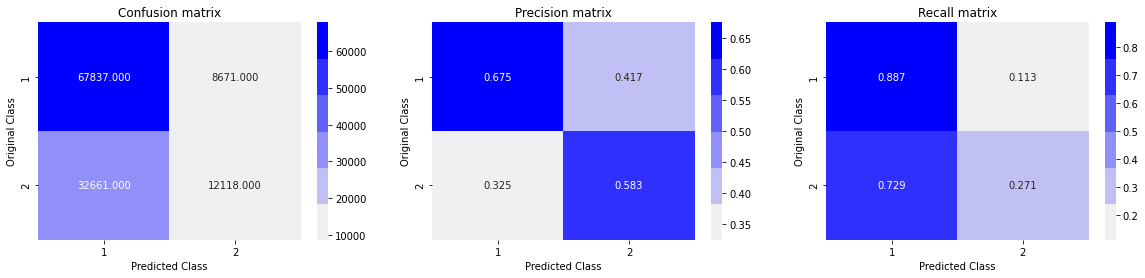

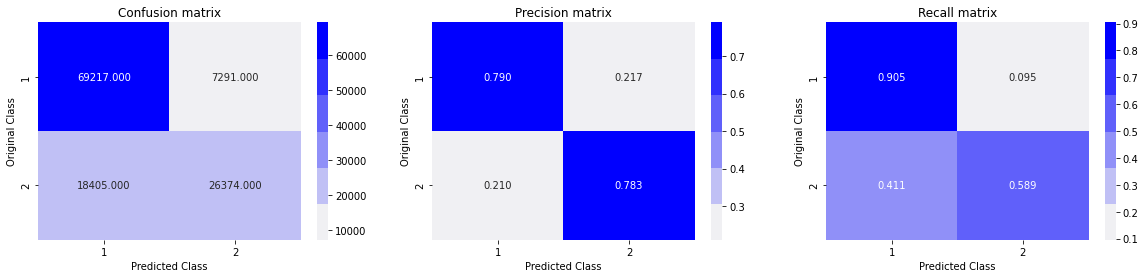

In [ ]:
plot_confusion_matrix(y_test_tmp3, predicted_y_tmp3)
plot_confusion_matrix(y_test_tmp4, predicted_y_tmp4)


In [ ]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot




lr_auc = roc_auc_score(y_test,  predict_y[:,1])
lr_auc_tmp3 = roc_auc_score(y_test_tmp3,  predict_y_tmp3[:,1])
lr_auc_tmp4 = roc_auc_score(y_test_tmp4,  predict_y_tmp4[:,1])

print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('Logistic_tmp3: ROC AUC=%.3f' % (lr_auc_tmp3))

print('Logistic_tmp4: ROC AUC=%.3f' % (lr_auc_tmp4))

Logistic: ROC AUC=0.870
Logistic_tmp3: ROC AUC=0.679
Logistic_tmp4: ROC AUC=0.878


In [ ]:
print(predict_y)

[[9.48195850e-01 5.18041502e-02]
 [8.64750057e-01 1.35249943e-01]
 [3.83006830e-01 6.16993170e-01]
 ...
 [8.28630216e-01 1.71369784e-01]
 [6.46930324e-01 3.53069676e-01]
 [4.23676871e-10 1.00000000e+00]]


For values of alpha =  1e-05 The log loss is: 0.4716035533790918
For values of alpha =  0.0001 The log loss is: 0.4723572540025166
For values of alpha =  0.001 The log loss is: 0.4653963196556877
For values of alpha =  0.01 The log loss is: 0.46894902326700133
For values of alpha =  0.1 The log loss is: 0.47712056558810584
For values of alpha =  1 The log loss is: 0.48886376882454347
For values of alpha =  10 The log loss is: 0.5421687101932612


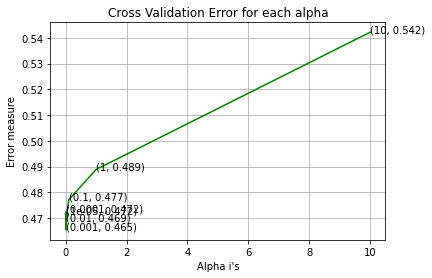

For values of best alpha =  0.001 The train log loss is: 0.4650312337656006
For values of best alpha =  0.001 The test log loss is: 0.4653963196556877
Total number of data points : 121287
Time elapsed for model with tmp5:- 423.20284628868103


In [ ]:
start = time.time()
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf_tmp5 = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=52)
    clf_tmp5.fit(X_train_tmp5, y_train_tmp5)
    sig_clf_tmp5 = CalibratedClassifierCV(clf_tmp5, method="sigmoid")
    sig_clf_tmp5.fit(X_train_tmp5, y_train_tmp5)
    predict_y_tmp5 = sig_clf_tmp5.predict_proba(X_test_tmp5)
    log_error_array.append(log_loss(y_test_tmp5, predict_y_tmp5, labels=clf_tmp5.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tmp5, predict_y_tmp5, labels=clf_tmp5.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf_tmp5 = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=52)
clf_tmp5.fit(X_train_tmp5, y_train_tmp5)
sig_clf_tmp5 = CalibratedClassifierCV(clf_tmp5, method="sigmoid")
sig_clf_tmp5.fit(X_train_tmp5, y_train_tmp5)

predict_y_tmp5 = sig_clf_tmp5.predict_proba(X_train_tmp5)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tmp5, predict_y_tmp5, labels=clf_tmp5.classes_, eps=1e-15))
predict_y_tmp5 = sig_clf_tmp5.predict_proba(X_test_tmp5)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tmp5, predict_y_tmp5, labels=clf_tmp5.classes_, eps=1e-15))
predicted_y_tmp5 =np.argmax(predict_y_tmp5,axis=1)
print("Total number of data points :", len(predicted_y_tmp5))
end = time.time()

print("Time elapsed for model with tmp5:-",end - start)

For values of alpha =  1e-06 The log loss is: 0.5345807342860766
For values of alpha =  1e-05 The log loss is: 0.5348332395042331
For values of alpha =  0.0001 The log loss is: 0.5270257655203978
For values of alpha =  0.001 The log loss is: 0.5456960909550577
For values of alpha =  0.01 The log loss is: 0.5527114534248035
For values of alpha =  0.1 The log loss is: 0.5518671865361985
For values of alpha =  1 The log loss is: 0.5773757556264063
For values of alpha =  10 The log loss is: 0.5881660582975237


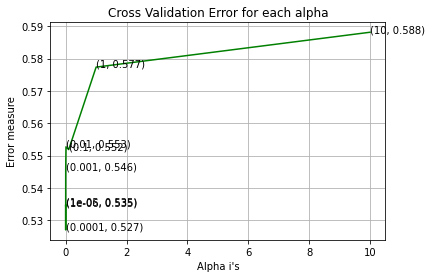

For values of best alpha =  0.0001 The train log loss is: 0.5282523329987063
For values of best alpha =  0.0001 The test log loss is: 0.5270257655203978
Total number of data points : 121287
Time elapsed for model with tmp6:- 1100.6119492053986


In [ ]:
start = time.time()
alpha = [10 ** x for x in range(-6, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf_tmp6 = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=62)
    clf_tmp6.fit(X_train_tmp6, y_train_tmp6)
    sig_clf_tmp6 = CalibratedClassifierCV(clf_tmp6, method="sigmoid")
    sig_clf_tmp6.fit(X_train_tmp6, y_train_tmp6)
    predict_y_tmp6 = sig_clf_tmp6.predict_proba(X_test_tmp6)
    log_error_array.append(log_loss(y_test_tmp6, predict_y_tmp6, labels=clf_tmp6.classes_, eps=1e-16))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tmp6, predict_y_tmp6, labels=clf_tmp6.classes_, eps=1e-16))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf_tmp6 = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=62)
clf_tmp6.fit(X_train_tmp6, y_train_tmp6)
sig_clf_tmp6 = CalibratedClassifierCV(clf_tmp6, method="sigmoid")
sig_clf_tmp6.fit(X_train_tmp6, y_train_tmp6)

predict_y_tmp6 = sig_clf_tmp6.predict_proba(X_train_tmp6)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tmp6, predict_y_tmp6, labels=clf_tmp6.classes_, eps=1e-16))
predict_y_tmp6 = sig_clf_tmp6.predict_proba(X_test_tmp6)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tmp6, predict_y_tmp6, labels=clf_tmp6.classes_, eps=1e-16))
predicted_y_tmp6 =np.argmax(predict_y_tmp6,axis=1)
print("Total number of data points :", len(predicted_y_tmp6))
end = time.time()

print("Time elapsed for model with tmp6:-",end - start)


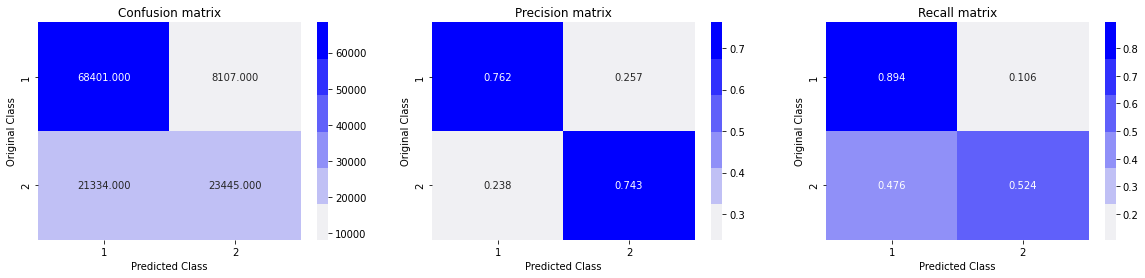

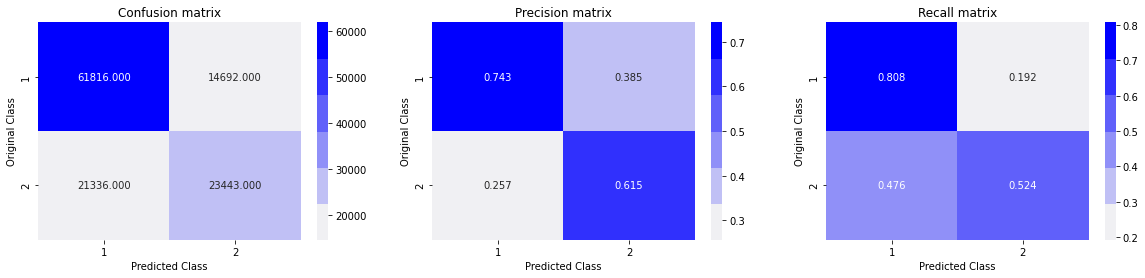

Logistic_tmp5: ROC AUC=0.842
Logistic_tmp6: ROC AUC=0.786


In [ ]:
plot_confusion_matrix(y_test_tmp5, predicted_y_tmp5)
plot_confusion_matrix(y_test_tmp6, predicted_y_tmp6)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot




lr_auc_tmp5 = roc_auc_score(y_test_tmp5,  predict_y_tmp5[:,1])
lr_auc_tmp6 = roc_auc_score(y_test_tmp6,  predict_y_tmp6[:,1])


print('Logistic_tmp5: ROC AUC=%.3f' % (lr_auc_tmp5))

print('Logistic_tmp6: ROC AUC=%.3f' % (lr_auc_tmp6))